# Decision trees for classification

---

## Importing libraries and data pre-processing

Libraries :
- sklearn
  - Importing breast cancer dataset
  - Splitting dataset into train and test sets
- pandas
  - Dataset is stored as pandas dataframe
- numpy
- matplotlib
  - For visualisation
- Ipython.display
  - For showing pandas Dataframes neatly
- decision_tree
  - Local file that contains the function build_tree, class DecisionNode and other functions

In [52]:
# sklearn for only the dataset, pandas for managing the dataset and numpy for processing
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn import tree

from time import time

from IPython.display import display
import matplotlib.pyplot as plt

from decision_tree import *

In [53]:
# Select the dataset from options iris, breast_cancer, digits, wine
dataset = 'wine'

data = None

print("Loading dataset '%s'"%dataset)

if(dataset == 'iris'):
    data = load_iris()
elif(dataset == 'breast_cancer'):
    data = load_breast_cancer()
elif(dataset == 'digits'):
    data = load_digits()
elif(dataset == 'wine'):
    data = load_wine()
else:
    print("Invalid dataset selected")

Loading dataset 'wine'


In [54]:
# Processing the dataset
x = data['data']
y = data['target']
col_names = data['feature_names']

# Creating a pandas dataframe from the dataset
x = pd.DataFrame(x, columns=col_names)
x['target'] = y
display(x)

# Getting the types of classes in the data output
tgt_classes = x['target'].unique()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


/home/ashwin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


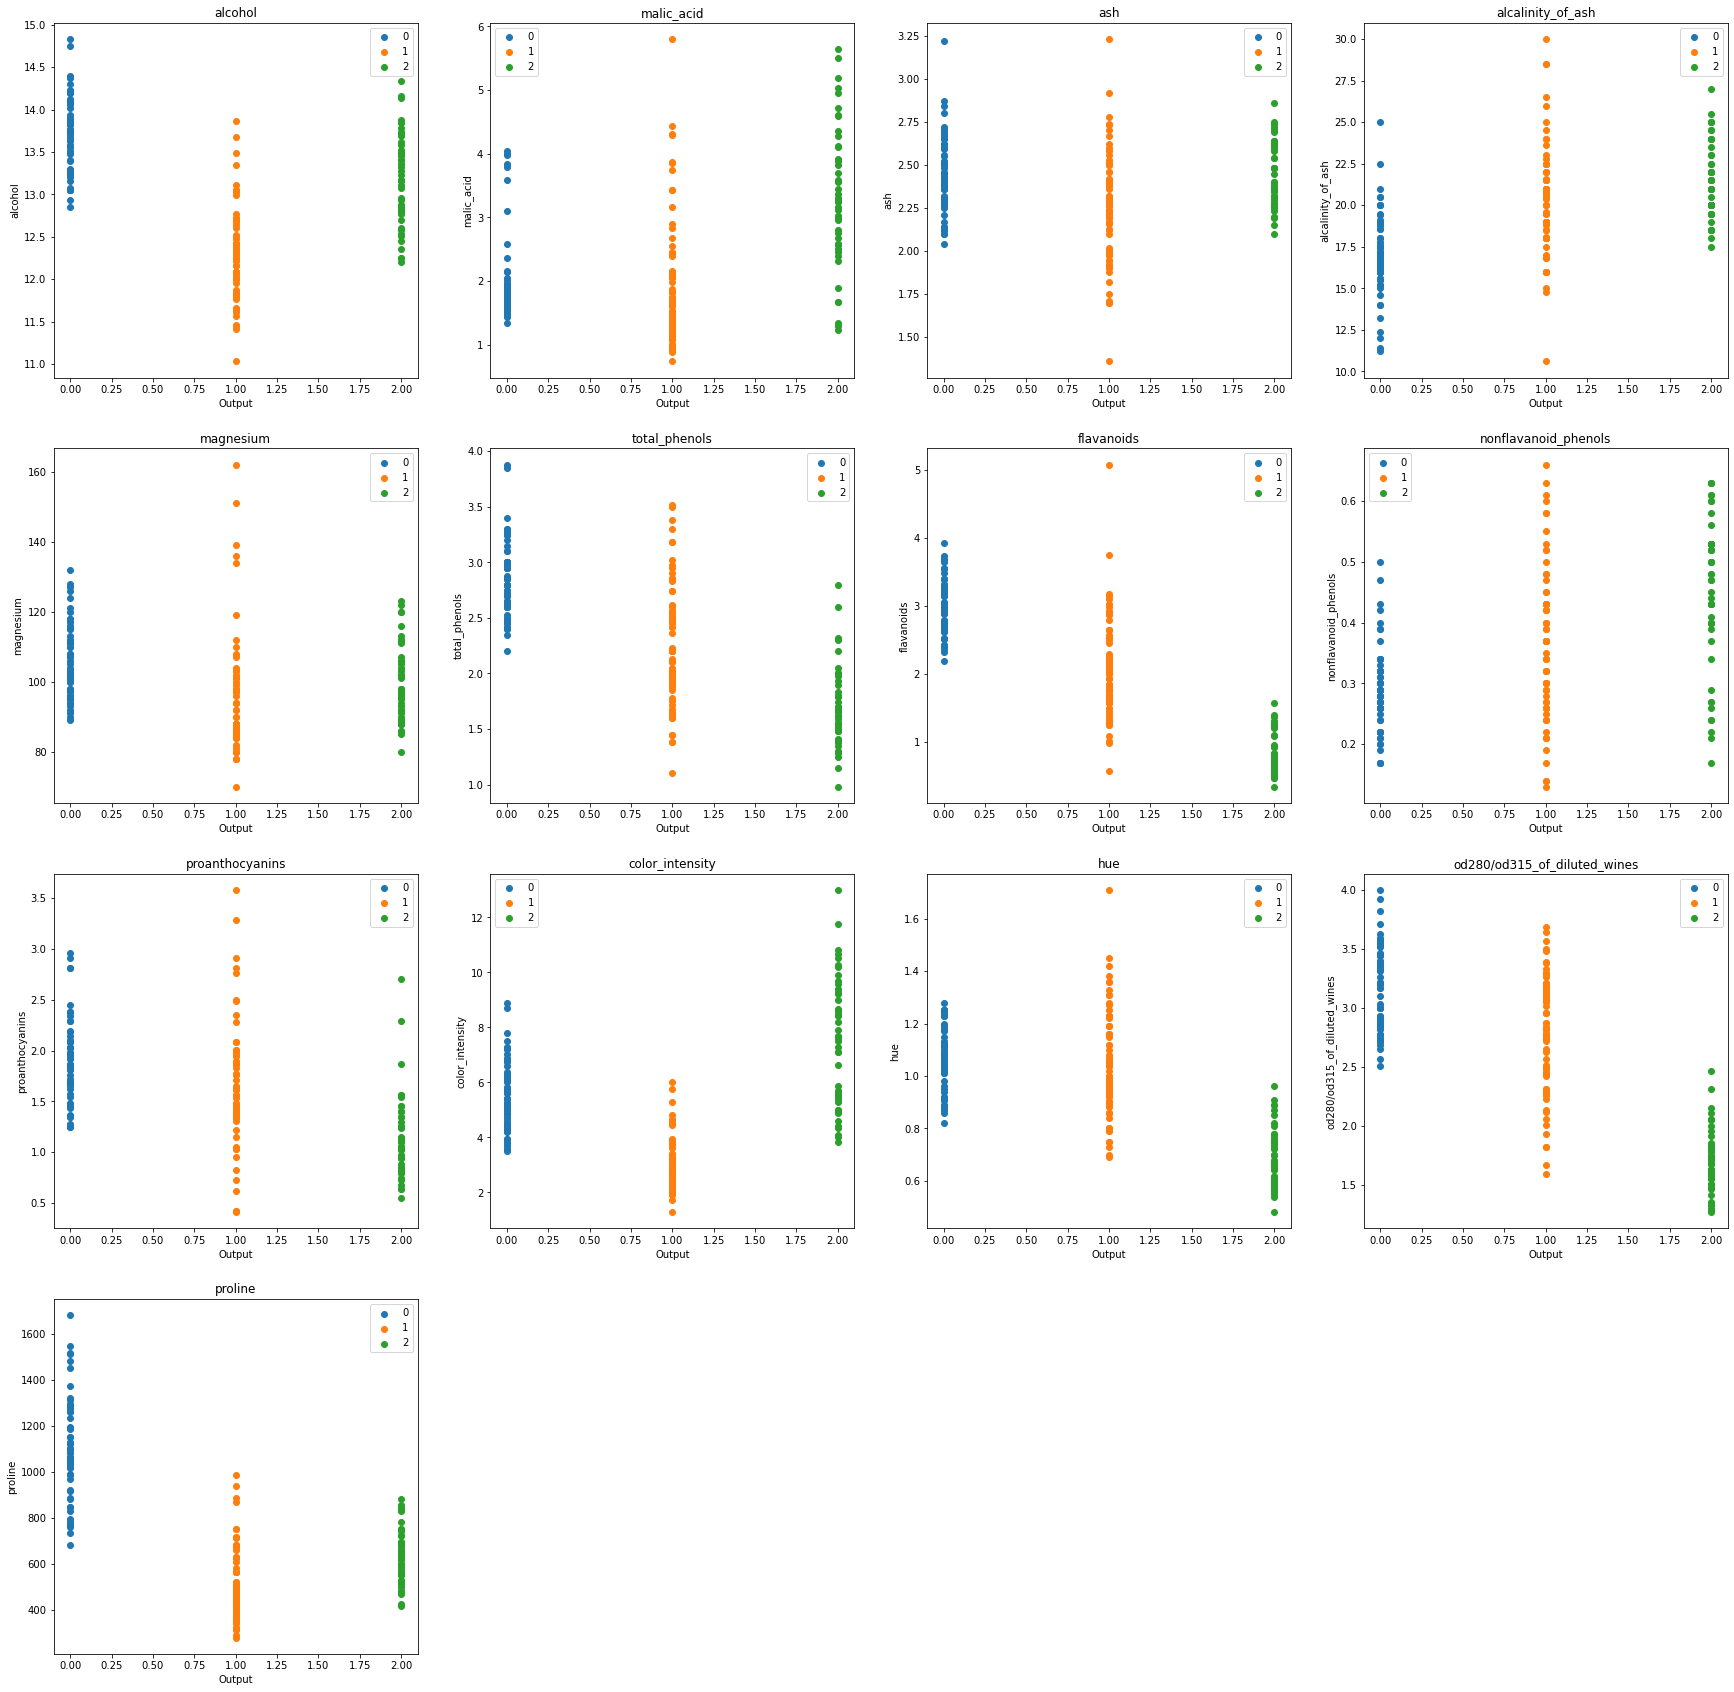

In [55]:
# Visualising the data as scatter plots
col_num = len(col_names)
plt_dim = np.ceil(np.sqrt(col_num))

plt.figure(figsize=(30, 30))

# Dividing data based on output, for coloring seperately
data_target_sorted = {}
for i in tgt_classes:
    data_target_sorted[i] = x.loc[x['target'] == i]

# Plotting the input values v/s target
for i in range(col_num):
    plt.subplot(plt_dim, plt_dim, i+1)
    plt.title(col_names[i])
    plt.ylabel(col_names[i])
    plt.xlabel('Output')
    for j in tgt_classes:
        data_target_j = data_target_sorted[j]
        plt.scatter(data_target_j['target'], data_target_j[col_names[i]])
    plt.legend(tgt_classes)

plt.show()

In [56]:
# Splitting the dataset
split_ratio = 0.1
train, test = train_test_split(x, test_size=int(x.shape[0]*0.1))

## Building the tree
Options:
- debug
  - Print information about fitting and classification process
- drop
  - If true, a column used for decision making once is then dropped from the dataset, so its children nodes cannot use it
- max_tries
  - The maximum number of thresholds that will be tried for a column
  - If this limit was exceeded, random sampling will be done from the existing thresholds. This is to improve fitting speed. It can also potentially reduce overfitting
- min_data
  - The minimum data required to train a node into a decision node. This helps to reduce overfitting.

In [57]:
# The level is the maximum number of decision nodes from root to the end (excluding leaf nodes)
tick = time()
root = build_tree(train, 5, debug=True, drop=False, max_tries=10, min_data=20)
print(" Fitting data took %.3f seconds"%(time()-tick))

            root : Initialised node with level :  0
            root : Trained. Impurity before : 0.66, Impurity : 0.42, Column : 'color_intensity', Threshold : 3.83
            root : Making children nodes...
           root+ : Initialised node with level :  1
           root- : Initialised node with level :  1
            root : Splitting input...
           root+ : Trained. Impurity before : 0.59, Impurity : 0.18, Column : 'flavanoids', Threshold : 1.79
           root+ : Making children nodes...
          root++ : Initialised node with level :  2
          root+- : Initialised node with level :  2
           root+ : Splitting input...
          root++ : Trained. Impurity before : 0.27, Impurity : 0.03, Column : 'proline', Threshold : 737.00
          root++ : Making children nodes...
         root+++ : Initialised node with level :  3
         root++- : Initialised node with level :  3
          root++ : Splitting input...
         root+++ : Trained. Impurity before : 0.00, Impurit

In [58]:
num_samples = 5

root.set_debug(False, propagate=True)

for i in np.random.choice(test.shape[0], num_samples, replace=False):
    print(" Testing on a sample : test set index '%d'"%i)
    display(test.iloc[i])
    result = root.classify(test.iloc[i])
    print()
    print(" Classification result : %d, Label : %d" % (result, test.iloc[i]['target']))
    print()
    

            root : Setting debug to False
           root+ : Setting debug to False
          root++ : Setting debug to False
         root+++ : Setting debug to False
         root++- : Setting debug to False
          root+- : Setting debug to False
         root+-+ : Setting debug to False
        root+-++ : Setting debug to False
        root+-+- : Setting debug to False
         root+-- : Setting debug to False
           root- : Setting debug to False
          root-+ : Setting debug to False
          root-- : Setting debug to False
         root--+ : Setting debug to False
         root--- : Setting debug to False
        root---+ : Setting debug to False
        root---- : Setting debug to False
 Testing on a sample : test set index '11'


alcohol                          12.42
malic_acid                        1.61
ash                               2.19
alcalinity_of_ash                22.50
magnesium                       108.00
total_phenols                     2.00
flavanoids                        2.09
nonflavanoid_phenols              0.34
proanthocyanins                   1.61
color_intensity                   2.06
hue                               1.06
od280/od315_of_diluted_wines      2.96
proline                         345.00
target                            1.00
Name: 117, dtype: float64


 Classification result : 1, Label : 1

 Testing on a sample : test set index '15'


alcohol                          13.84
malic_acid                        4.12
ash                               2.38
alcalinity_of_ash                19.50
magnesium                        89.00
total_phenols                     1.80
flavanoids                        0.83
nonflavanoid_phenols              0.48
proanthocyanins                   1.56
color_intensity                   9.01
hue                               0.57
od280/od315_of_diluted_wines      1.64
proline                         480.00
target                            2.00
Name: 156, dtype: float64


 Classification result : 2, Label : 2

 Testing on a sample : test set index '13'


alcohol                           13.16
malic_acid                         2.36
ash                                2.67
alcalinity_of_ash                 18.60
magnesium                        101.00
total_phenols                      2.80
flavanoids                         3.24
nonflavanoid_phenols               0.30
proanthocyanins                    2.81
color_intensity                    5.68
hue                                1.03
od280/od315_of_diluted_wines       3.17
proline                         1185.00
target                             0.00
Name: 2, dtype: float64


 Classification result : 0, Label : 0

 Testing on a sample : test set index '14'


alcohol                          13.24
malic_acid                        2.59
ash                               2.87
alcalinity_of_ash                21.00
magnesium                       118.00
total_phenols                     2.80
flavanoids                        2.69
nonflavanoid_phenols              0.39
proanthocyanins                   1.82
color_intensity                   4.32
hue                               1.04
od280/od315_of_diluted_wines      2.93
proline                         735.00
target                            0.00
Name: 4, dtype: float64


 Classification result : 1, Label : 0

 Testing on a sample : test set index '0'


alcohol                          13.68
malic_acid                        1.83
ash                               2.36
alcalinity_of_ash                17.20
magnesium                       104.00
total_phenols                     2.42
flavanoids                        2.69
nonflavanoid_phenols              0.42
proanthocyanins                   1.97
color_intensity                   3.84
hue                               1.23
od280/od315_of_diluted_wines      2.87
proline                         990.00
target                            0.00
Name: 32, dtype: float64


 Classification result : 0, Label : 0



In [59]:
error = 0

for i in test.index:
    inp = test.loc[i]
    out = root.classify(inp)
    if(out != inp['target']):
        error = error+1

total = test.shape[0]
print(" Test set accuracy  : %4d/%4d - %.2f%%" % (total-error,total, 100*(total - error)/total))

error = 0

for i in train.index:
    inp = train.loc[i]
    out = root.classify(inp)
    if(out != inp['target']):
        error = error+1

total = train.shape[0]
print(" Train set accuracy : %4d/%4d - %.2f%%" % (total-error,total, 100*(total - error)/total))

 Test set accuracy  :   16/  17 - 94.12%
 Train set accuracy :  157/ 161 - 97.52%


/home/ashwin/Projects/ML_Projects/decision_trees/decision_tree.py:144: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
 Saving output as ./Images/wine_decisiontree_v2.jpeg


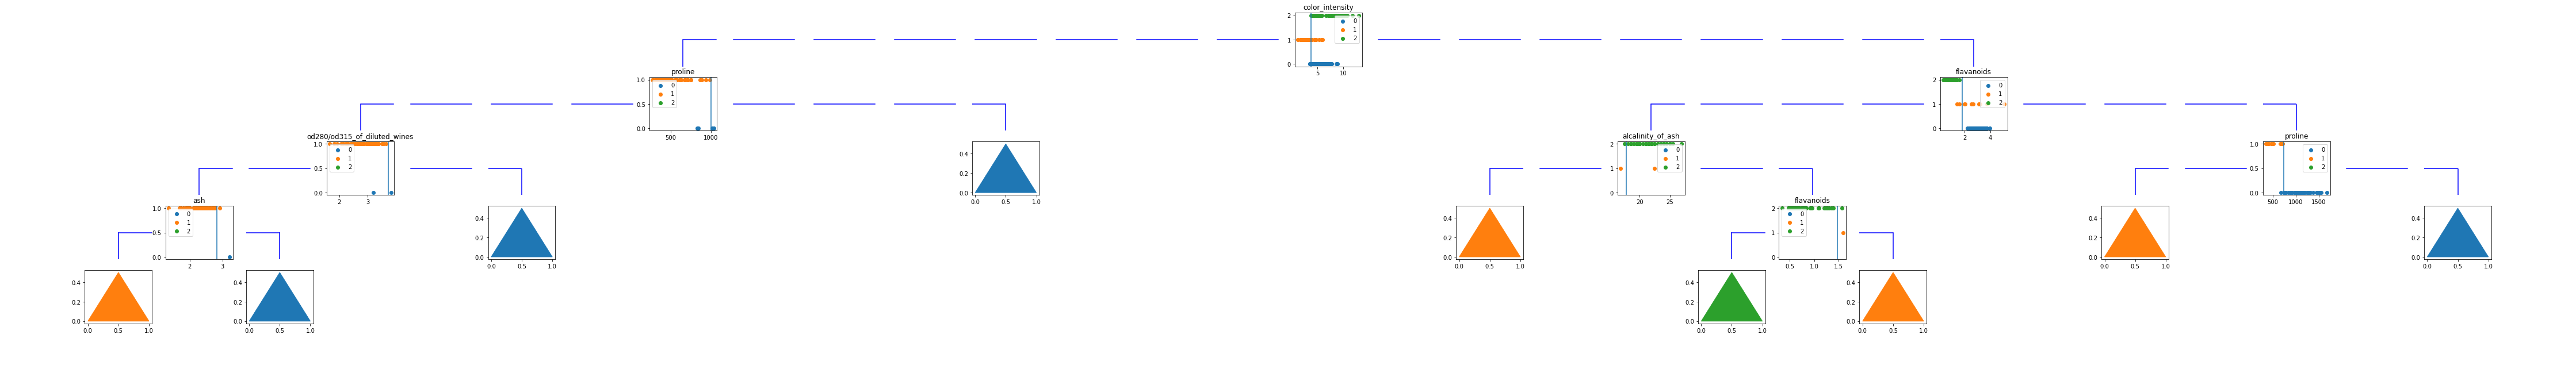

In [60]:
save="./Images/%s_decisiontree_v2.jpeg"%dataset
visualize_tree_working(x, root, 5, save=save)

## Interpreting the above diagram

Triangles are leaf nodes with color denoting output. The scatter plots are decision nodes, with the data and threshold (as a line) plotted. The upper child node of a node is displayed one level below and towards the right, and the lower child node is displayed below and towards the left.

In [ ]:
tree